## Theory

Activation functions helps to determine the output of a neural network. These type of functions are attached to each neuron in the network, and determines whether it should be activated or not, based on whether each neuron’s input is relevant for the model’s prediction.

> Activation function also helps to normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.


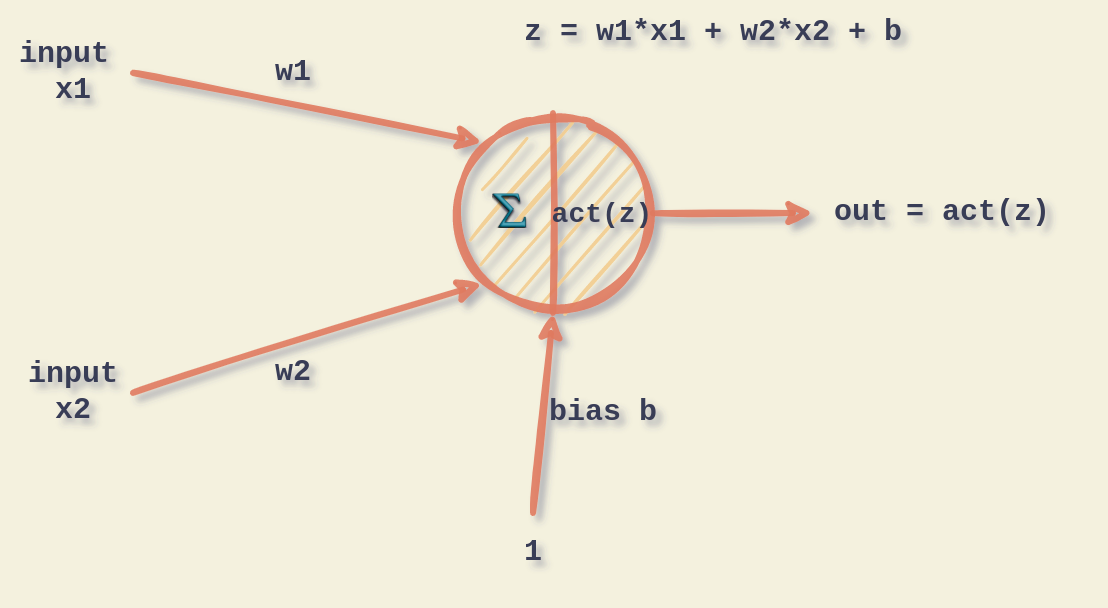

In a neural network, inputs are fed into the neurons in the input layer. Each neuron has a weight, and multiplying the input number with the weight gives the output of the neuron, which is transferred to the next layer.

The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold.


> Neural networks use non-linear activation functions, which can help the network learn complex data, compute and learn almost any function representing a question, and provide accurate predictions.

### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
x = np.linspace(-10, 10, 100)

def plot_graph(x, y, 
               ALPHA=0.6, 
               label_x = r"$x \rightarrow$", label_y=r"$act(x) \rightarrow$", 
               title=None,
               LABEL=None):
    plt.figure(figsize=(7,5))
    plt.axhline(y=0, color="black", linestyle="--", lw=2)
    plt.axvline(x=0, color="black", linestyle="--", lw=2)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)

    if LABEL != None:
        plt.plot(x, y, alpha=ALPHA, label=LABEL);
        plt.legend(fontsize=14)

    else:
        plt.plot(x, y, alpha=ALPHA);
        
def derivative(f, z, delta_z=1e-6):
    return (f(z + delta_z) - f(z))/(delta_z)

Lets see the list of all the activation functions we have and go through them one by one

In [3]:
[i for i in dir(tf.keras.activations) if not i.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

### Sigmoid Activation

Sigmoid takes a real value as the input and outputs another value between 0 and 1. The sigmoid activation function translates the input ranged in (-∞,∞) to the range in (0,1)

Following are the formula and chart of the same 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

$$where\ \sigma(x) \in (0, 1),\\
and\ x \in [-\infty, +\infty]$$

In [4]:
## Python Implementation (Tensorflow and Numpy versions)

def sigmoid_tf(x):
    return tf.keras.activations.sigmoid(x)

## OR

def sigmoid_np(x):
    return 1/ (1 + np.exp(-x))

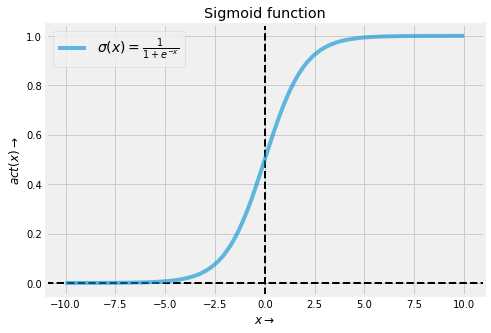

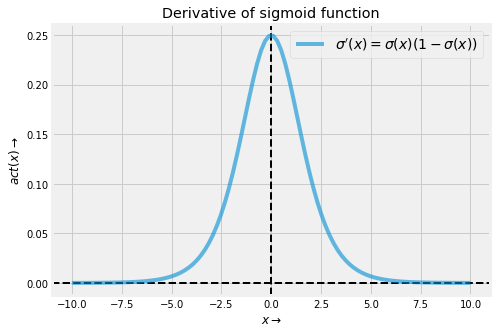

In [5]:
plot_graph(x, sigmoid_np(x), title="Sigmoid function", 
           LABEL=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")

plot_graph(x, derivative(sigmoid_np, x), title="Derivative of sigmoid function", 
           LABEL=r"$\sigma^\prime(x) = \sigma(x)(1-\sigma(x))$")

### Hyperbolic tangent activation function (tanh)

The tanh function is just another possible function that can be used as a non-linear activation function between layers of a neural network. It shares a few things in common with the sigmoid activation function. Unlike a sigmoid function that will map input values between 0 and 1, the Tanh will map values between -1 and 1. Similar to the sigmoid function, one of the interesting properties of the tanh function is that the derivative of tanh can be expressed in terms of the function itself.

The tanh function formula and curve are as follows

$$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})}$$

$$where\ \tanh(x) \in (-1, 1),\\
and\ x \in [-\infty, +\infty]$$ 

In [7]:
## Python Implementation (Tensorflow and Numpy versions)

def tanh_tf(x):
    return tf.keras.activations.tanh(x)

## OR

def tanh_np(x):
    return np.tanh(x)

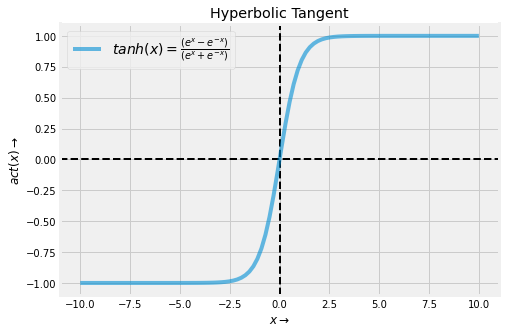

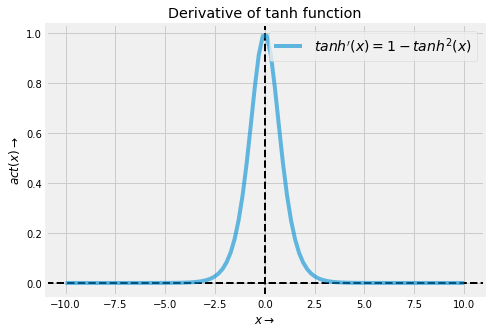

In [8]:
plot_graph(x, tanh_tf(x), title="Hyperbolic Tangent",
           LABEL=r"$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})}$");

plot_graph(x, derivative(tanh_tf, x), title="Derivative of tanh function", 
           LABEL=r"$tanh^\prime(x) = 1 - tanh^2(x)$")

### Rectified linear unit activation function (ReLU)

The ReLU function is actually a function that takes the maximum value. Note that this is not fully interval-derivable, but we can take sub-gradient, as shown in the figure above. Although ReLU is simple, it is an important achievement in recent years.

The ReLU (Rectified Linear Unit) function is an activation function that is currently more popular. Compared with the sigmod function and the tanh function, it has the following advantages:

1) When the input is positive, there is no gradient saturation problem.

2) The calculation speed is much faster. The ReLU function has only a linear relationship (before and after 0 i.e. conditionally linear). Whether it is forward or backward, it is much faster than sigmod and tanh. (Sigmod and tanh need to calculate the exponent, which will be slower.)

Ofcourse, there are disadvantages:

1) When the input is negative, ReLU is completely inactive, which means that once a negative number is entered, ReLU will die. In this way, in the forward propagation process, it is not a problem. Some areas are sensitive and some are insensitive. But in the backpropagation process, if you enter a negative number, the gradient will be completely zero, which has the same problem as the sigmod function and tanh function.

2) We find that the output of the ReLU function is either 0 or a positive number, which means that the ReLU function is not a 0-centric function.

ReLU function formula and curve are as follows

$$ReLU(x)= max(x,0)$$

$$where\ ReLU(x) \in (0, x),\\
and\ x \in [-\infty, +\infty]$$

In [9]:
## Python Implementation (Tensorflow and Numpy versions)

def relu_tf(x):
    return tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)

## OR

def relu_np(x):
    return np.where(x>=0, x, 0)

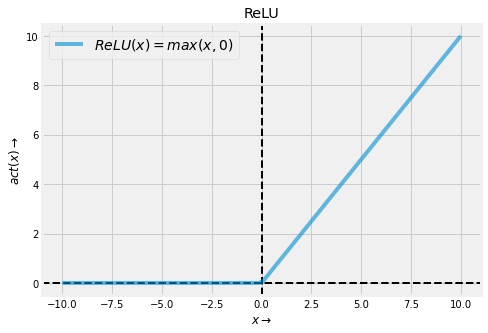

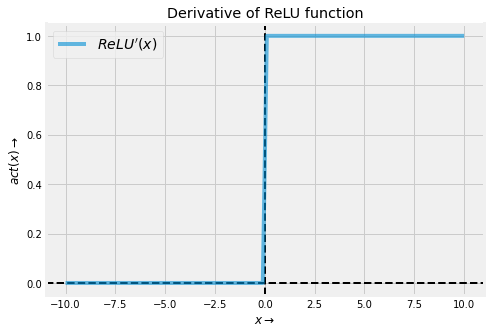

In [10]:
plot_graph(x, relu_tf(x), title="ReLU",
           LABEL=r"$ReLU(x)= max(x,0)$");

plot_graph(x, derivative(relu_tf, x), title="Derivative of ReLU function", 
           LABEL=r"$ReLU^\prime(x)$")

### Leaky ReLU activation function

Leaky Relu is a variant of ReLU. Instead of being 0 when z<0, a leaky ReLU allows a small, non-zero, constant gradient α (normally, α=0.01). However, the consistency of the benefit across tasks is presently unclear. Leaky ReLUs attempt to fix the “dying ReLU” problem.

Leaky ReLU function formula and curve are as follows

$$ 
leaky\_relu(x, \alpha) = \left\{\begin{matrix} 
x & x\geq 0 \\ 
\alpha x & x \lt 0 
\end{matrix}\right.
$$

$$where\ x \in [-\infty, +\infty]$$

In [11]:
## Python Implementation (Tensorflow and Numpy versions)

def leaky_relu_np(x, alpha=0.3):
    return np.where(x>=0, x, alpha*x)

## OR

def leaky_relu_tf(x):
    return tf.keras.layers.LeakyReLU(x)

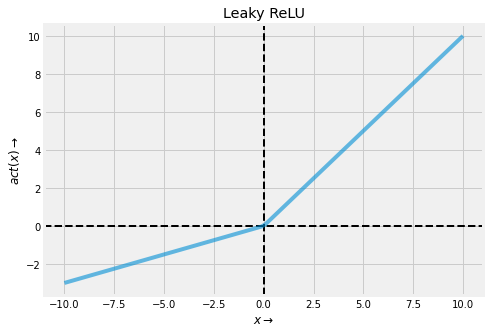

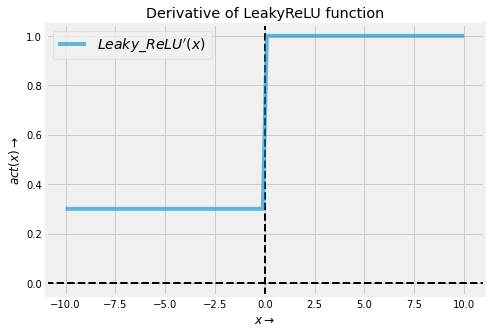

In [14]:
plot_graph(x, leaky_relu_np(x), title="Leaky ReLU");

plot_graph(x, derivative(leaky_relu_np, x), title="Derivative of LeakyReLU function", 
           LABEL=r"$Leaky\_ReLU^\prime(x)$")

### ELU (Exponential Linear Units) function

ELU is also proposed to solve the problems of ReLU. Obviously, ELU has all the advantages of ReLU, and:

* No Dead ReLU issues
* The mean of the output is close to 0, zero-centered

One small problem is that it is slightly more computationally intensive. Similar to Leaky ReLU, although theoretically better than ReLU, there is currently no good evidence in practice that ELU is always better than ReLU.

Following are the formula and charts of the function

$$elu(x, \alpha) = \left\{\begin{matrix} x & x\geq0\\ \alpha \cdot (e^{x} - 1) & x \lt 0 \end{matrix}\right.$$

$$\alpha\ = scaler\ slope\ of\ negative\ section$$

In [17]:
def elu_tf(x, ALPHA=1.0):
    return tf.keras.activations.elu(x, alpha=ALPHA)

## OR

def elu_np(x, ALPHA=1.0):
    return np.where(x>0, x, (ALPHA * (np.exp(x) - 1)))

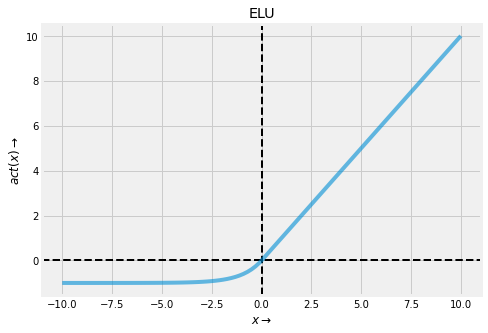

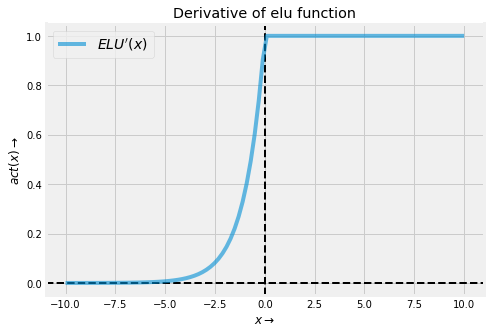

In [18]:
plot_graph(x, elu_np(x), title="ELU");

plot_graph(x, derivative(elu_np, x), title="Derivative of elu function", 
           LABEL=r"$ELU^\prime(x)$")

### Scaled ELU (SELU) activation

In [27]:
def selu_tf(x, ALPHA=1.0):
    return tf.keras.activations.selu(x)

## OR

def selu_np(z, scale=1.05070098, alpha=1.67326324):
    return scale * elu(z, alpha)

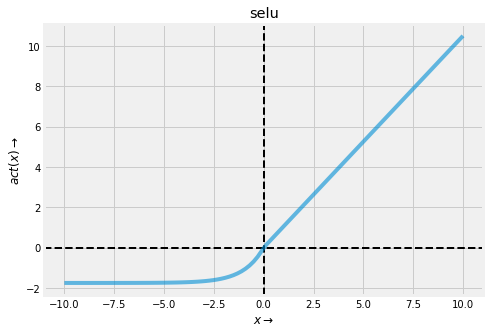

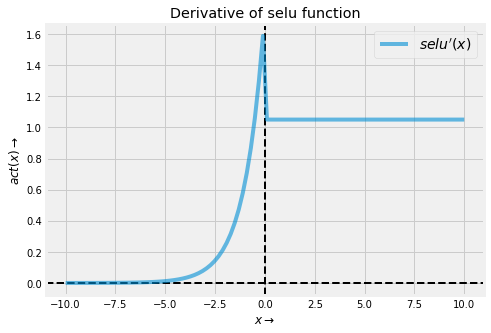

In [21]:
plot_graph(x, selu_tf(x), title="selu");

plot_graph(x, derivative(selu_tf, x), title="Derivative of selu function", 
           LABEL=r"$selu^\prime(x)$")

### ParametricReLu (PReLu)

$$f(y_i) = \left\{\begin{matrix} y_i & y_i>0\\ \alpha_i \cdot y_i & y_i \leq 0 \end{matrix}\right.$$

### Softmax activation function

Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In a general way, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will help determine the target class for the given inputs.



$$S(x_j)=\frac{e^{x_j}}{\sum_{k=1}^{K} e^{x_k}}, where\ j = 1,2, \cdots, K $$

for an arbitrary real vector of length K, Softmax can compress it into a real vector of length K with a value in the range (0, 1), and the sum of the elements in the vector is 1. 

It also has many applications in Multiclass Classification and neural networks. Softmax is different from the normal max function: the max function only outputs the largest value, and Softmax ensures that smaller values have a smaller probability and will not be discarded directly. It is a "max" that is "soft".

The denominator of the Softmax function combines all factors of the original output value, which means that the different probabilities obtained by the Softmax function are related to each other.
In the case of binary classification, for Sigmoid, there are:

$$p(y= 1|x) = \frac{1}{1+e^{-\theta^Tx}}$$

$$p(y= 0|x) = 1- p(y= 1|x)  =\frac{e^{-\theta^Tx}}{1+e^{-\theta^Tx}}$$

For Softmax with K = 2, there are:

$$p(y= 1|x) = \frac{e^{\theta_1^Tx}}{e^{\theta_0^Tx} + e^{\theta_1^Tx}} = \frac{1}{1+e^{(\theta_0^T-\theta_1^T)x}} = \frac{1}{1+e^{-\beta x}}$$


$$p(y= 0|x) = \frac{e^{\theta_0^Tx}}{e^{\theta_0^Tx} + e^{\theta_1^Tx}} = \frac{e^{(\theta_0^T-\theta_1^T)x}}{1+e^{(\theta_0^T-\theta_1^T)x}} = \frac{e^{-\beta x}}{1+e^{-\beta x}}$$


Among them:

$$\beta = - (\theta_0^T-\theta_1^T)$$

can be seen that in the case of binary classification, Softmax is degraded to Sigmoid.

In [29]:
## Example of softmax

tf.keras.activations.softmax(tf.constant([[0.3,0.3,0.4,0.5,0.7]]), axis=-1)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.1718686 , 0.1718686 , 0.18994418, 0.2099208 , 0.25639784]],
      dtype=float32)>

### Maxout

The Maxout activation is a generalization of the ReLU and the leaky ReLU functions. It is a piecewise linear function that returns the maximum of inputs, designed to be used in conjunction with the dropout regularization technique. Both ReLU and leaky ReLU are special cases of Maxout. The Maxout neuron, therefore, enjoys all the benefits of a ReLU unit and does not have any drawbacks like dying ReLU. However, it doubles the total number of parameters for each neuron, and hence, a higher total number of parameters need to be trained.

![](https://paperswithcode.com/media/methods/new_activation_plots.jpg)

$$f(x) = max(w_1^Tx + b_1, w_2^Tx+b_2)$$

The main drawback of Maxout is that it is computationally expensive as it doubles the number of parameters for each neuron.

[reference](https://paperswithcode.com/method/maxout)

### Swish